In [307]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import Image, display
import imutils

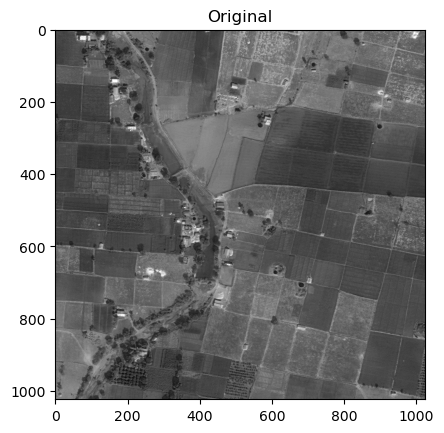

In [7]:
image = cv2.imread('104883_sat.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap ='gray')
plt.title("Original");

In [13]:
gray = image.copy()

## Morphological Transformations

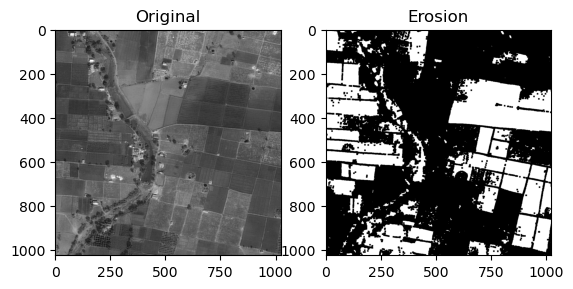

In [65]:
image = cv2.imread('104883_sat.jpg', cv2.IMREAD_GRAYSCALE)

binr = cv2.threshold(image, 0, 255, 
                     cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
kernel = np.ones((3, 3), np.uint8)

invert = cv2.bitwise_not(binr)

erosion = cv2.erode(invert, kernel, iterations=3)

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Erosion")
plt.imshow(erosion, cmap='gray');

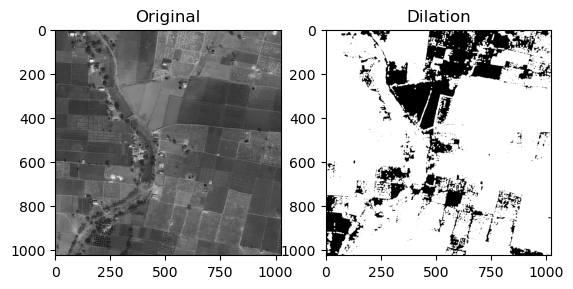

In [67]:
image = cv2.imread('104883_sat.jpg', cv2.IMREAD_GRAYSCALE)

binr = cv2.threshold(image, 0, 255, 
                     cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
kernel = np.ones((3, 3), np.uint8)

invert = cv2.bitwise_not(binr)

dilation = cv2.dilate(invert, kernel, iterations=2)

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Dilation")
plt.imshow(dilation, cmap='gray');

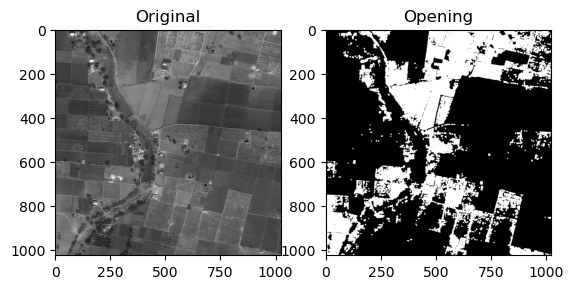

In [70]:
image = cv2.imread('104883_sat.jpg', cv2.IMREAD_GRAYSCALE)

binr = cv2.threshold(image, 0, 255, 
                     cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
kernel = np.ones((3, 3), np.uint8)

invert = cv2.bitwise_not(binr)

opening = cv2.morphologyEx(binr, cv2.MORPH_OPEN, 
                           kernel, iterations=2) 

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Opening")
plt.imshow(opening, cmap='gray');

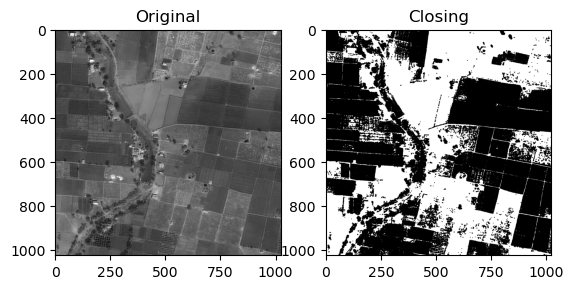

In [72]:
image = cv2.imread('104883_sat.jpg', cv2.IMREAD_GRAYSCALE)

binr = cv2.threshold(image, 0, 255, 
                     cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
kernel = np.ones((3, 3), np.uint8)

invert = cv2.bitwise_not(binr)

closing = cv2.morphologyEx(binr, cv2.MORPH_CLOSE, 
                           kernel, iterations=1) 

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Closing")
plt.imshow(closing, cmap='gray');

## Method 2

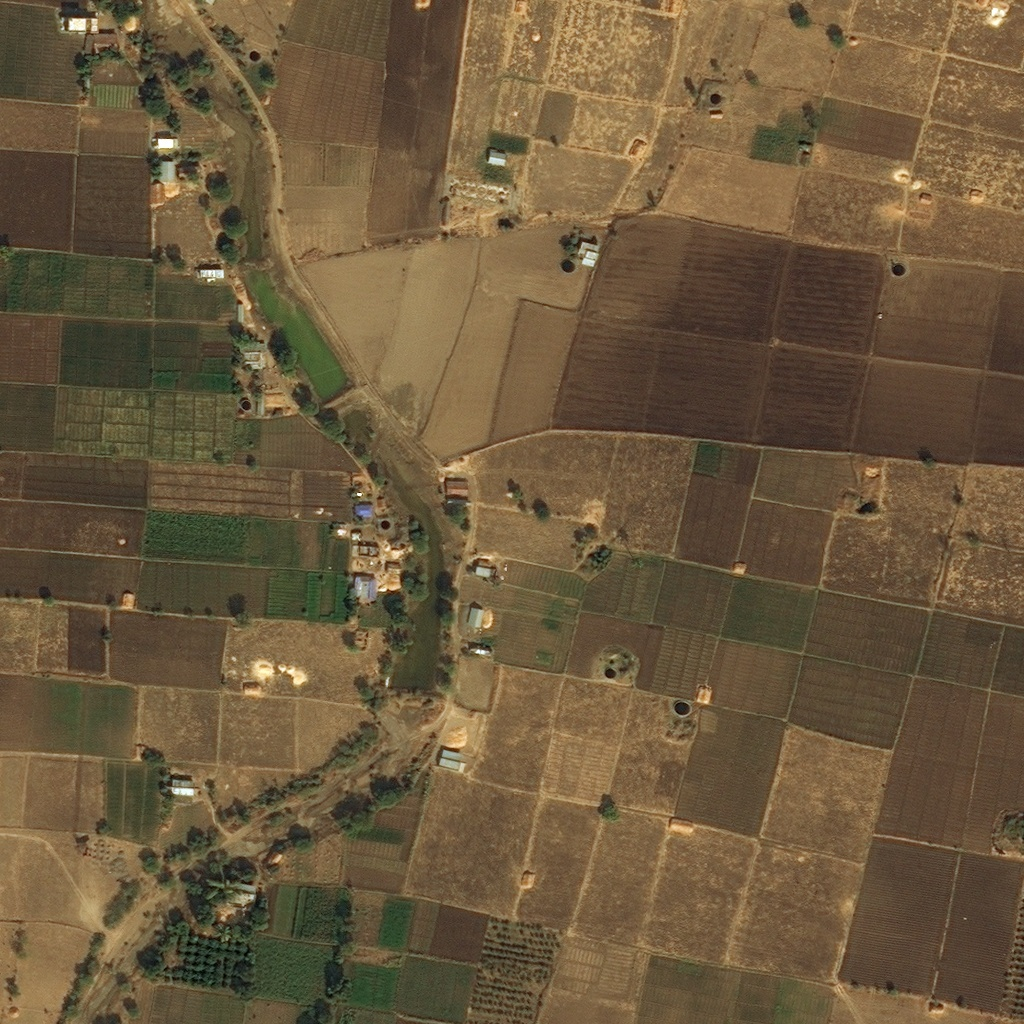

In [416]:
def imshow(img, ax=None):
    if ax is None:
        ret, encoded = cv2.imencode(".jpg", img)
        display(Image(encoded))
    else:
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis('off')
 

img = cv2.imread('104883_sat.jpg')
imshow(img)

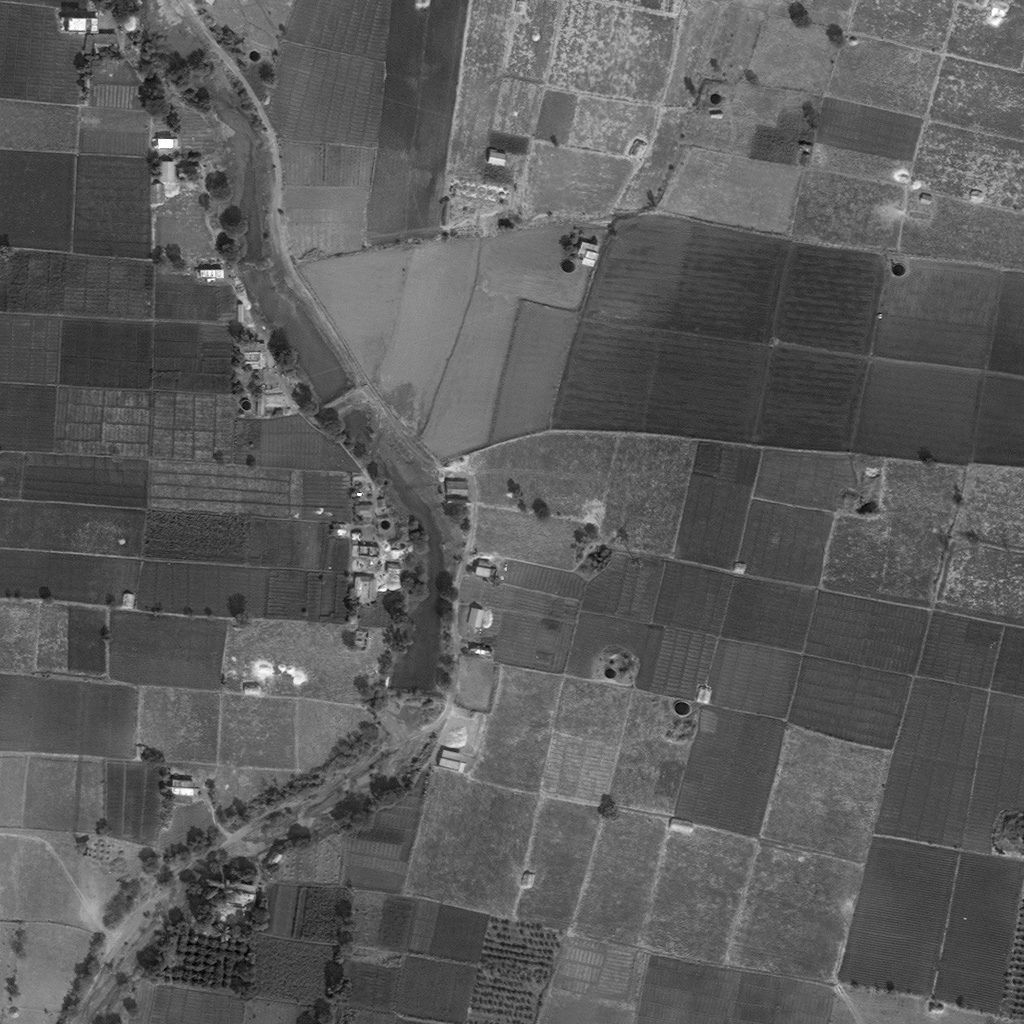

In [417]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imshow(gray)

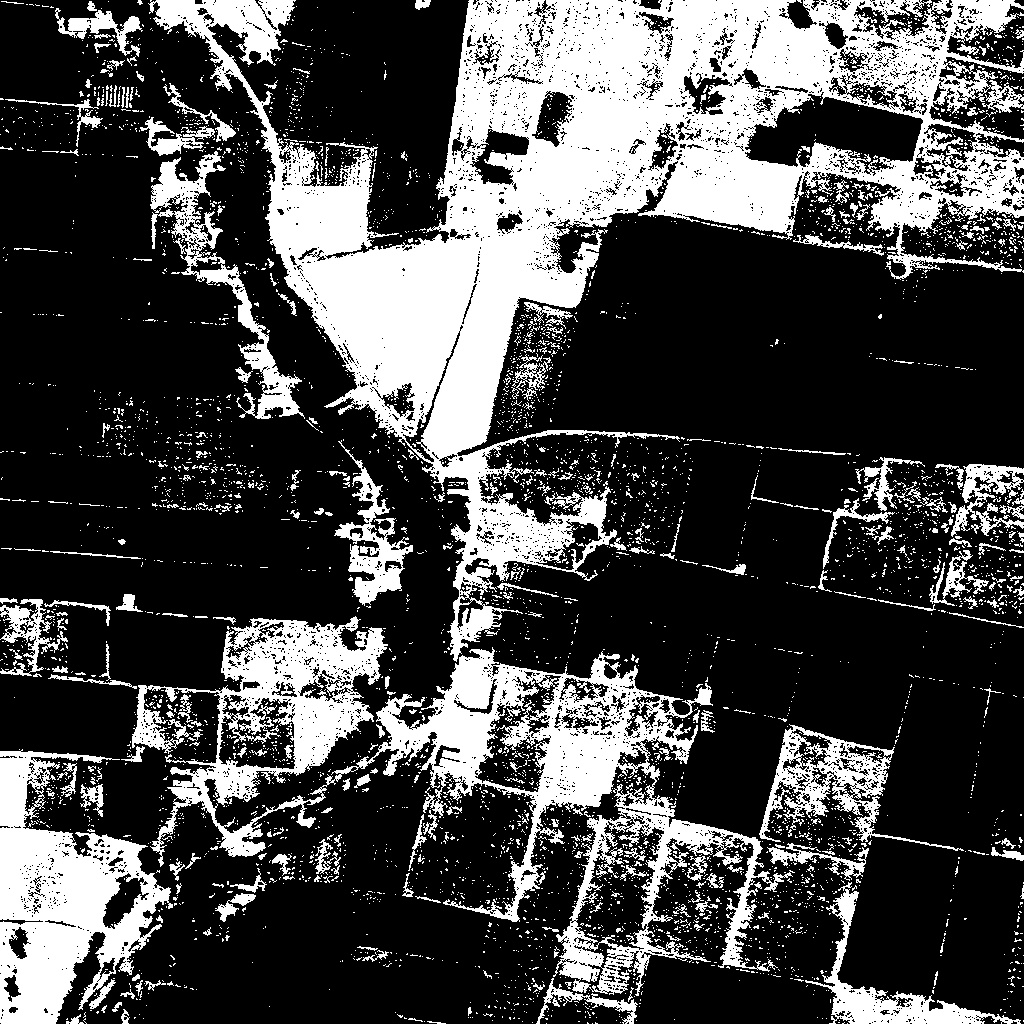

In [418]:
ret, bin_img = cv2.threshold(gray,
                             105, 255, 
                             cv2.THRESH_BINARY)
imshow(bin_img)

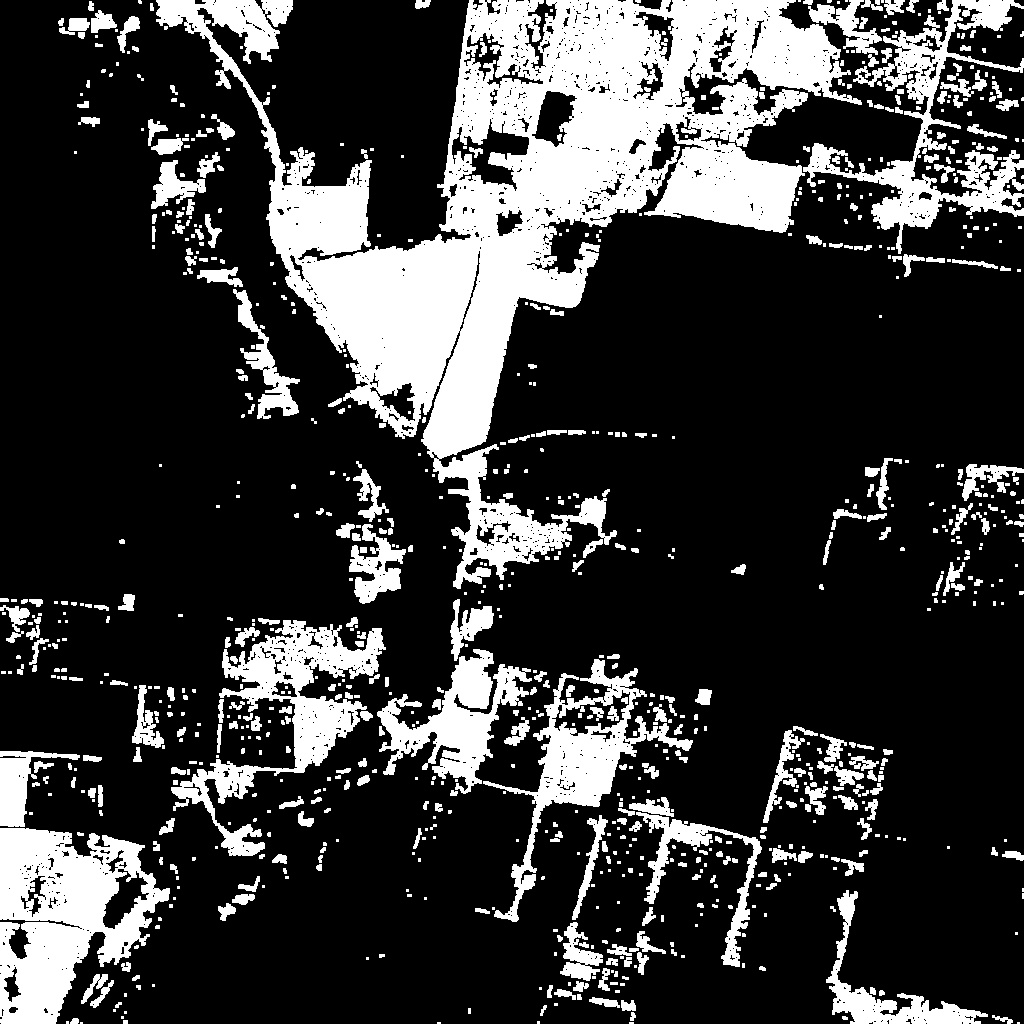

In [419]:
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
kernel = np.ones((3,3), np.uint8)
bin_img = cv2.morphologyEx(bin_img, 
                           cv2.MORPH_OPEN,
                           kernel,
                           iterations=1)
imshow(bin_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


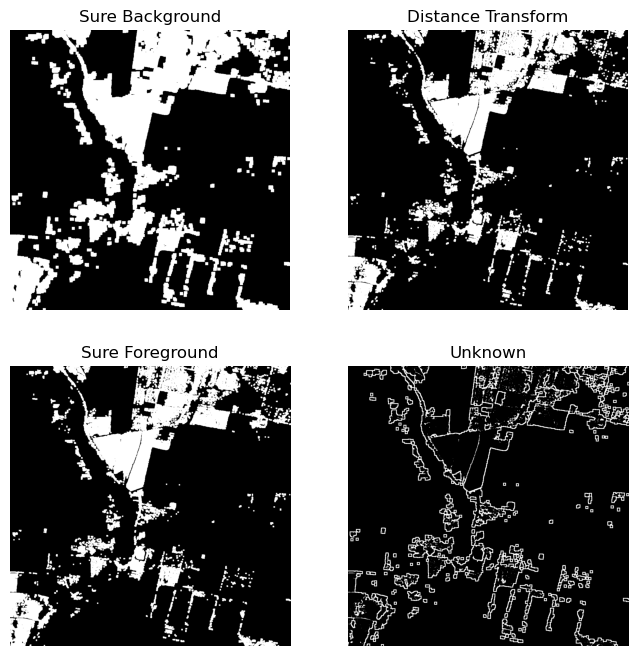

In [171]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
# sure background area
sure_bg = cv2.dilate(bin_img, kernel, iterations=3)
imshow(sure_bg, axes[0,0])
axes[0, 0].set_title('Sure Background')
 
# Distance transform
dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 5)
imshow(dist, axes[0,1])
axes[0, 1].set_title('Distance Transform')
 
#foreground area
ret, sure_fg = cv2.threshold(dist, 0.0000005 * dist.max(), 255, cv2.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8)  
imshow(sure_fg, axes[1,0])
axes[1, 0].set_title('Sure Foreground')
 
# unknown area
unknown = cv2.subtract(sure_bg, sure_fg)
imshow(unknown, axes[1,1])
axes[1, 1].set_title('Unknown')
 
plt.show()

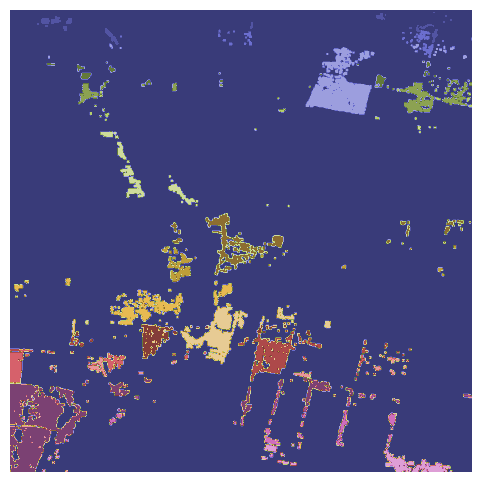

In [172]:
ret, markers = cv2.connectedComponents(sure_fg)
 
# Add one to all labels so that background is not 0, but 1
markers += 1
# mark the region of unknown with zero
markers[unknown >= 200]= 0
 
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()

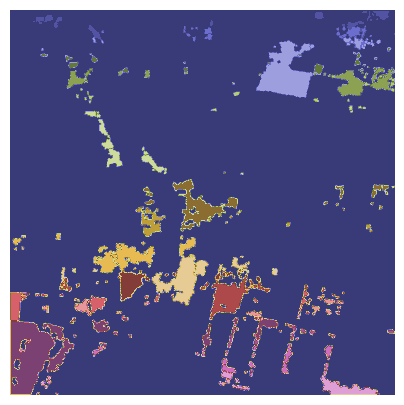

In [173]:
markers = cv2.watershed(img, markers)
 
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()
 


In [174]:
labels = np.unique(markers)
labels

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

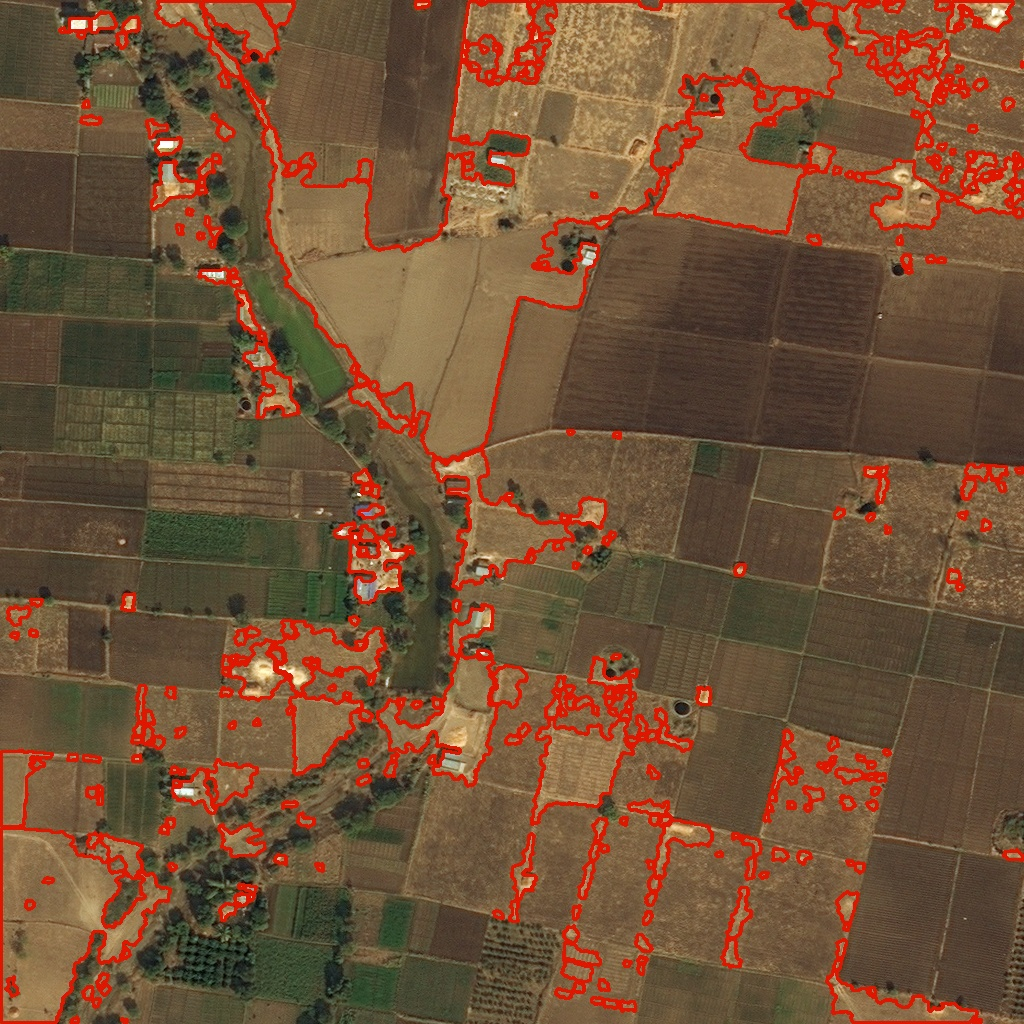

In [175]:
coins = []
for label in labels[2:]:  
 
# Create a binary image in which only the area of the label is in the foreground 
#and the rest of the image is in the background   
    target = np.where(markers == label, 255, 0).astype(np.uint8)
   
  # Perform contour extraction on the created binary image
    contours, hierarchy = cv2.findContours(
        target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    coins.append(contours[0])
 
# Draw the outline
img = cv2.drawContours(img, coins, -1, color=(0, 23, 223), thickness=2)
imshow(img)

## METHOD 3

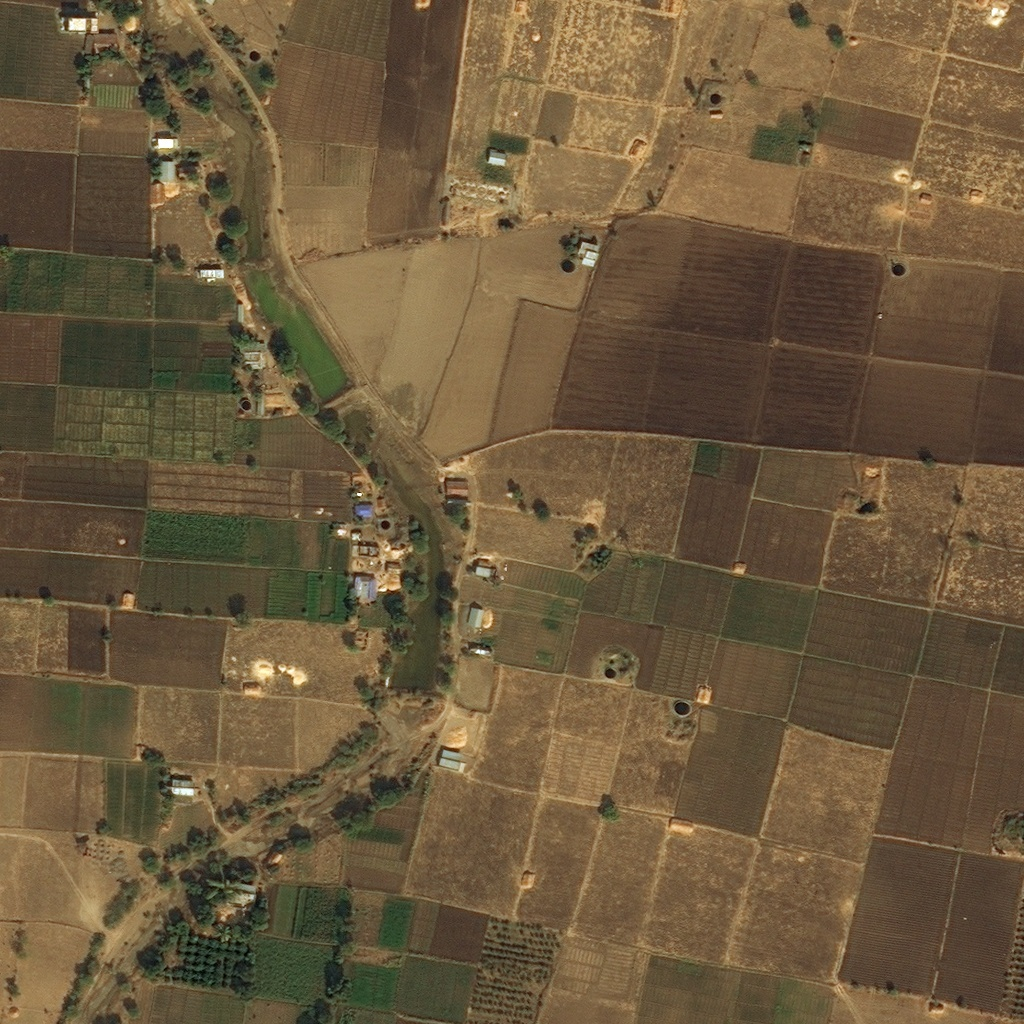

In [420]:
img = cv2.imread('104883_sat.jpg')

imshow(img)

In [421]:
lower_yellow = np.array([128,173,201])
upper_yellow = np.array([82,122,115])

In [424]:
mask = cv2.inRange(img, upperb = lower_yellow, lowerb = upper_yellow)

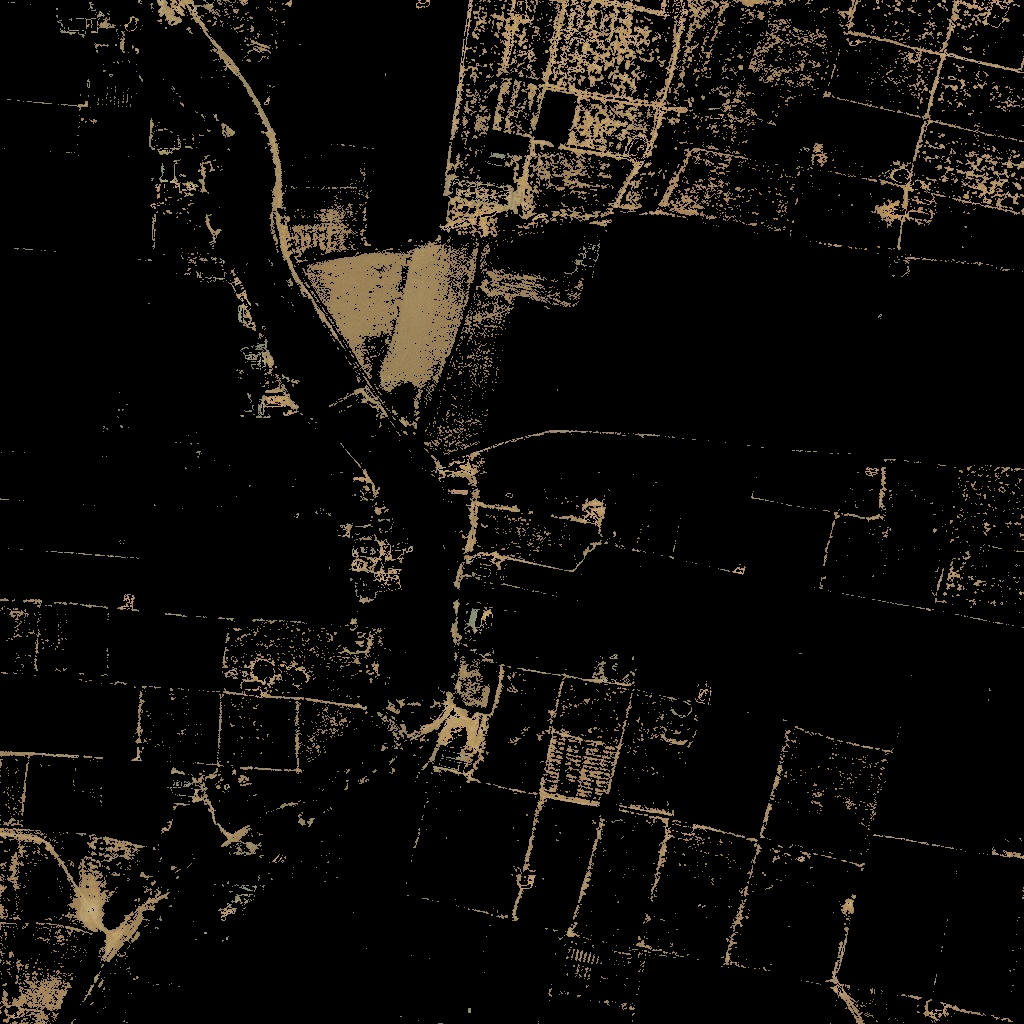

In [425]:
result = cv2.bitwise_and(img,img, mask= mask)
imshow(result)

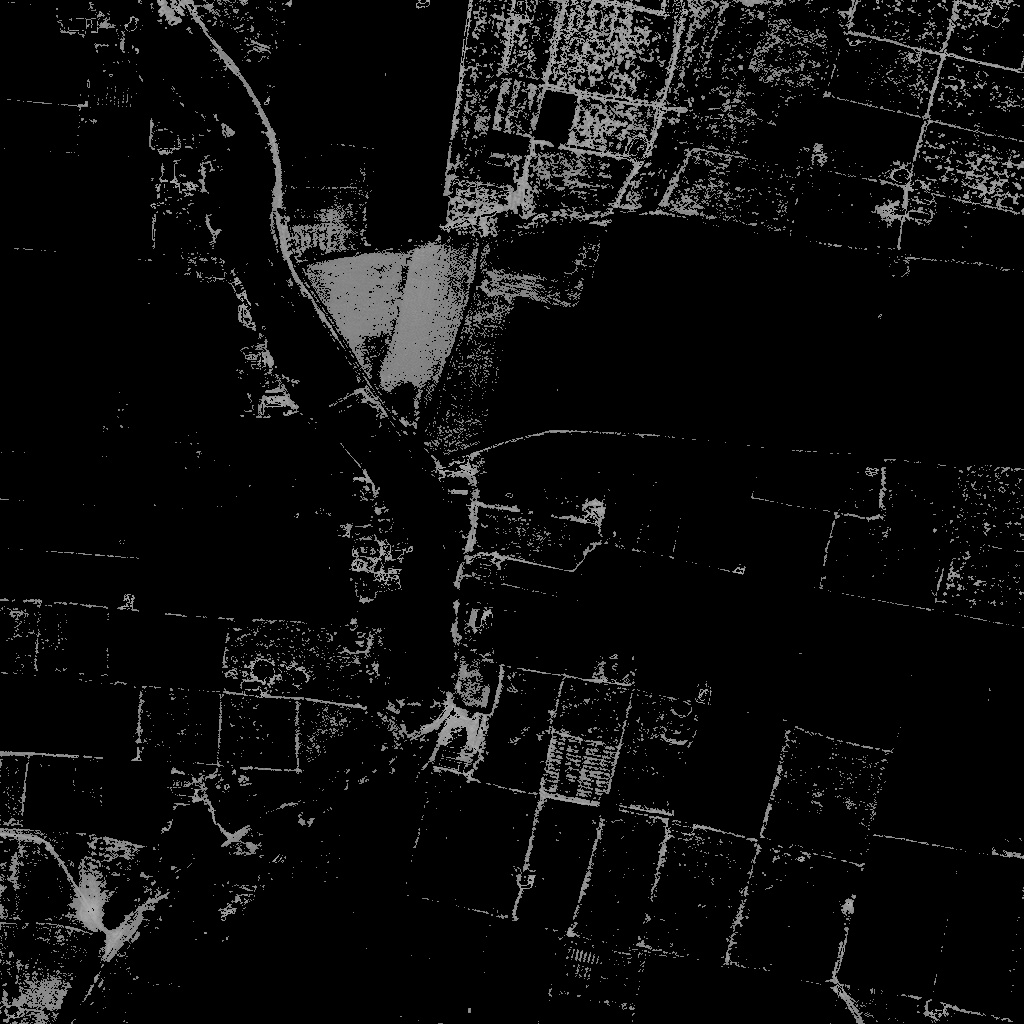

In [490]:
new_img = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
imshow(new_img)

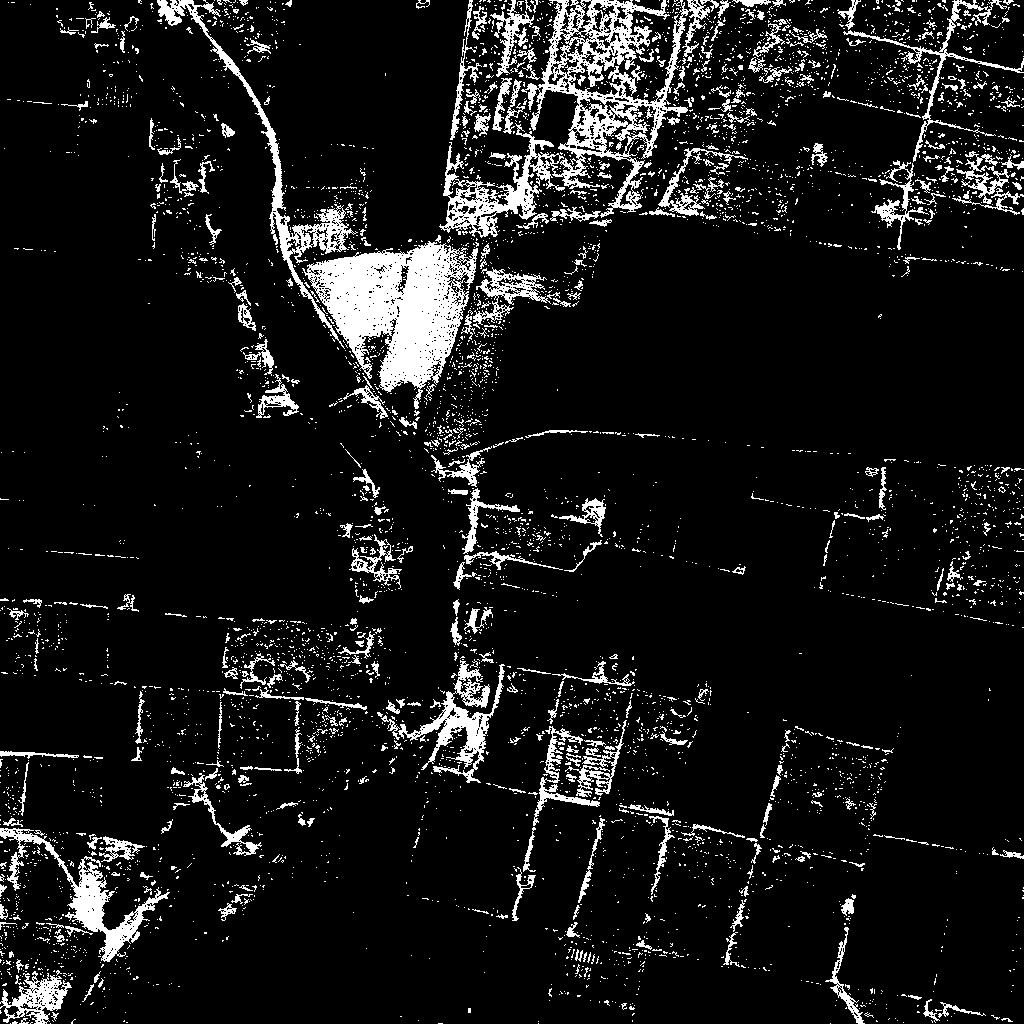

In [481]:
ret, bin_img = cv2.threshold(new_img,
                             105, 255, 
                             cv2.THRESH_BINARY)
imshow(bin_img)

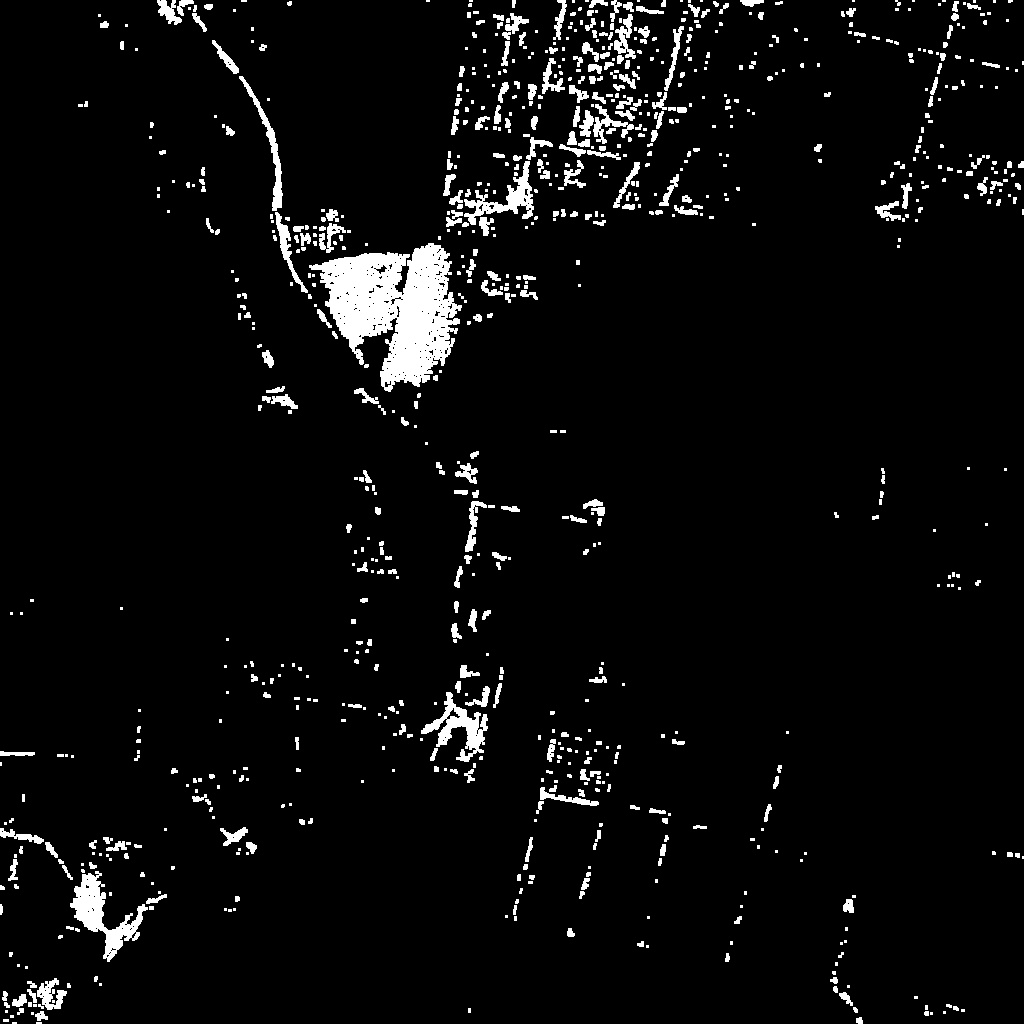

In [482]:
kernel = np.ones((3,3), np.uint8)
bin_img = cv2.morphologyEx(bin_img, 
                           cv2.MORPH_OPEN,
                           kernel,
                           iterations=1)
imshow(bin_img)

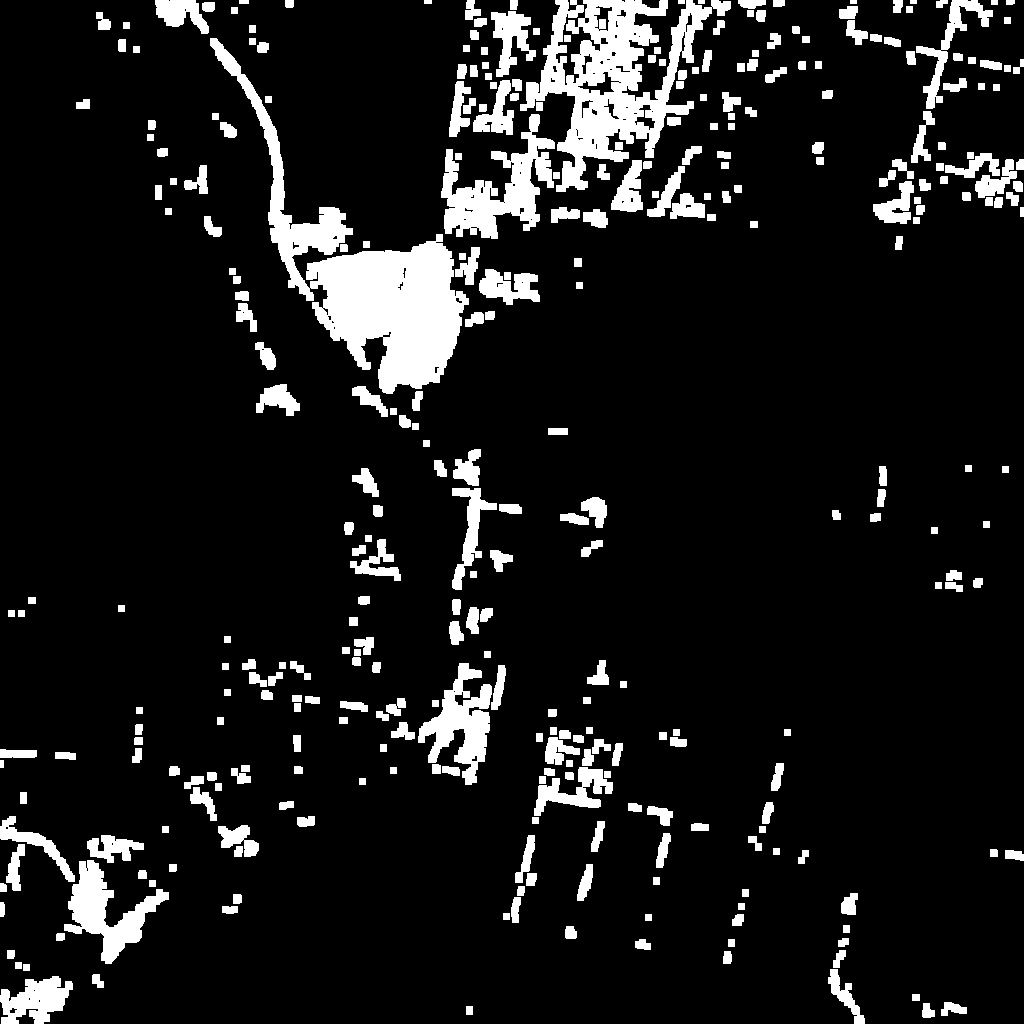

In [483]:
binr = cv2.threshold(bin_img, 0, 255, 
                     cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
kernel = np.ones((3, 3), np.uint8)

dilation = cv2.dilate(binr, kernel, iterations=2)
imshow(dilation)

# OUTPUT 1

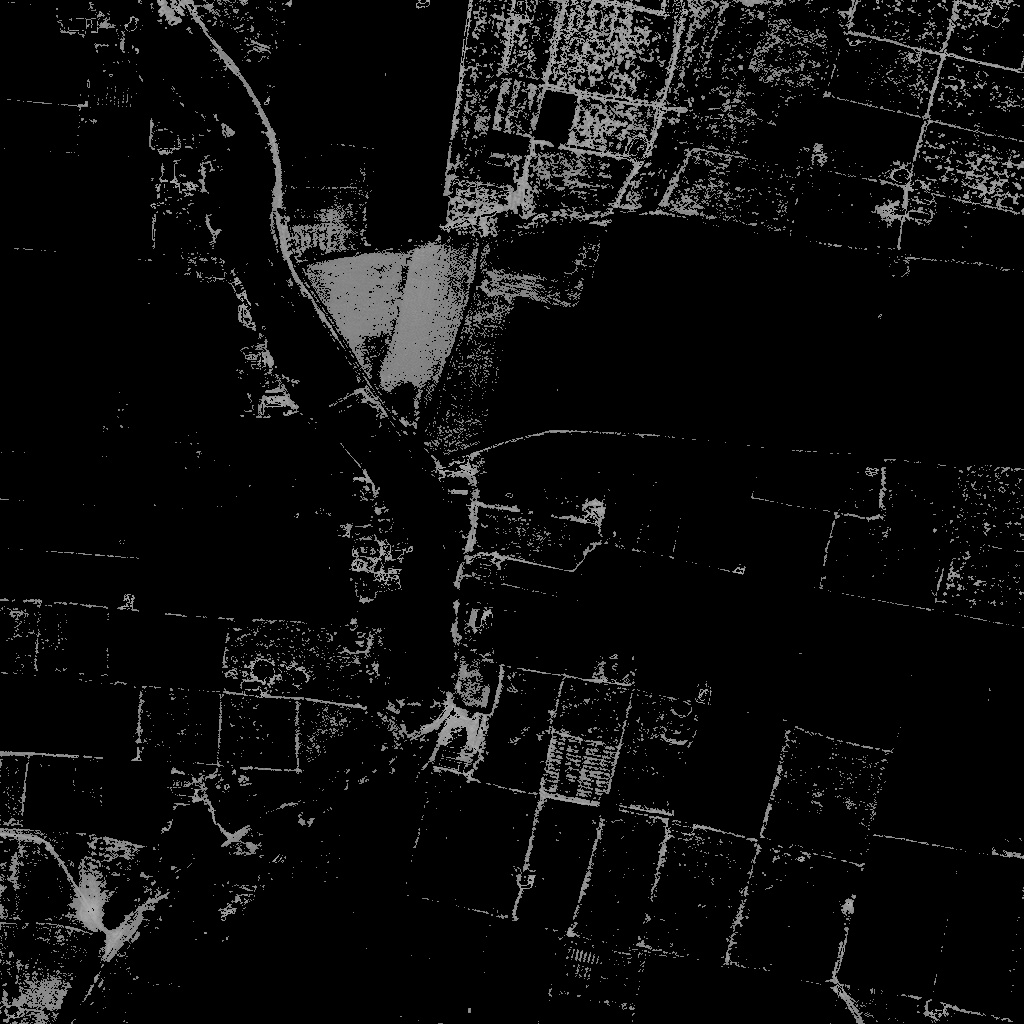

In [543]:
new_img = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
imshow(new_img)

In [544]:
cnts = cv2.findContours(new_img, cv2
                        .RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [545]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

In [546]:
areas = []

In [547]:
len(cnts)

5397

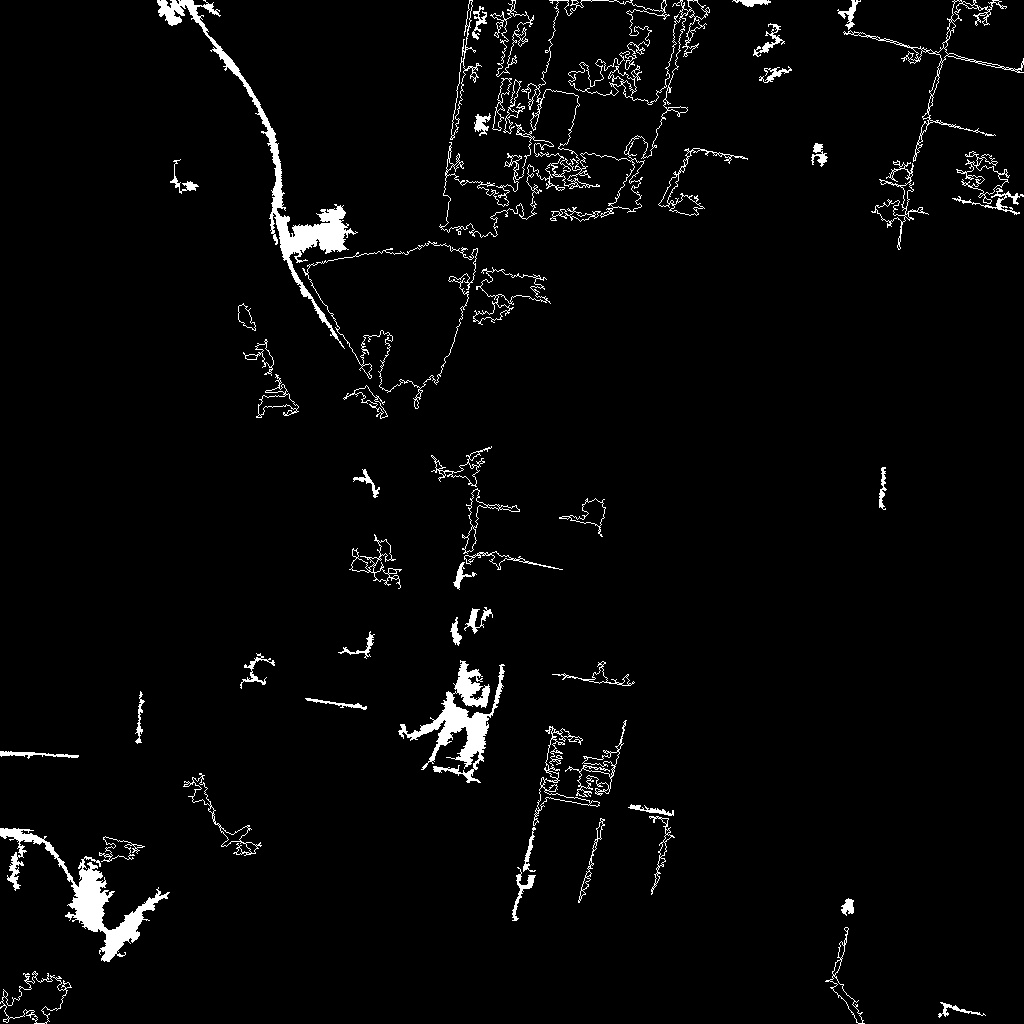

In [551]:
for c in cnts:
    area = cv2.contourArea(c)
    
    if area > 10000 and area < 20000:
        areas.append(c)
        
blank_img = np.zeros(new_img.shape, np.uint8)
cv2.fillPoly(blank_img, pts = areas, color = (255,255,255))
imshow(blank_img)

In [552]:
blank_img.shape

(1024, 1024)

In [553]:
temp = blank_img.copy()

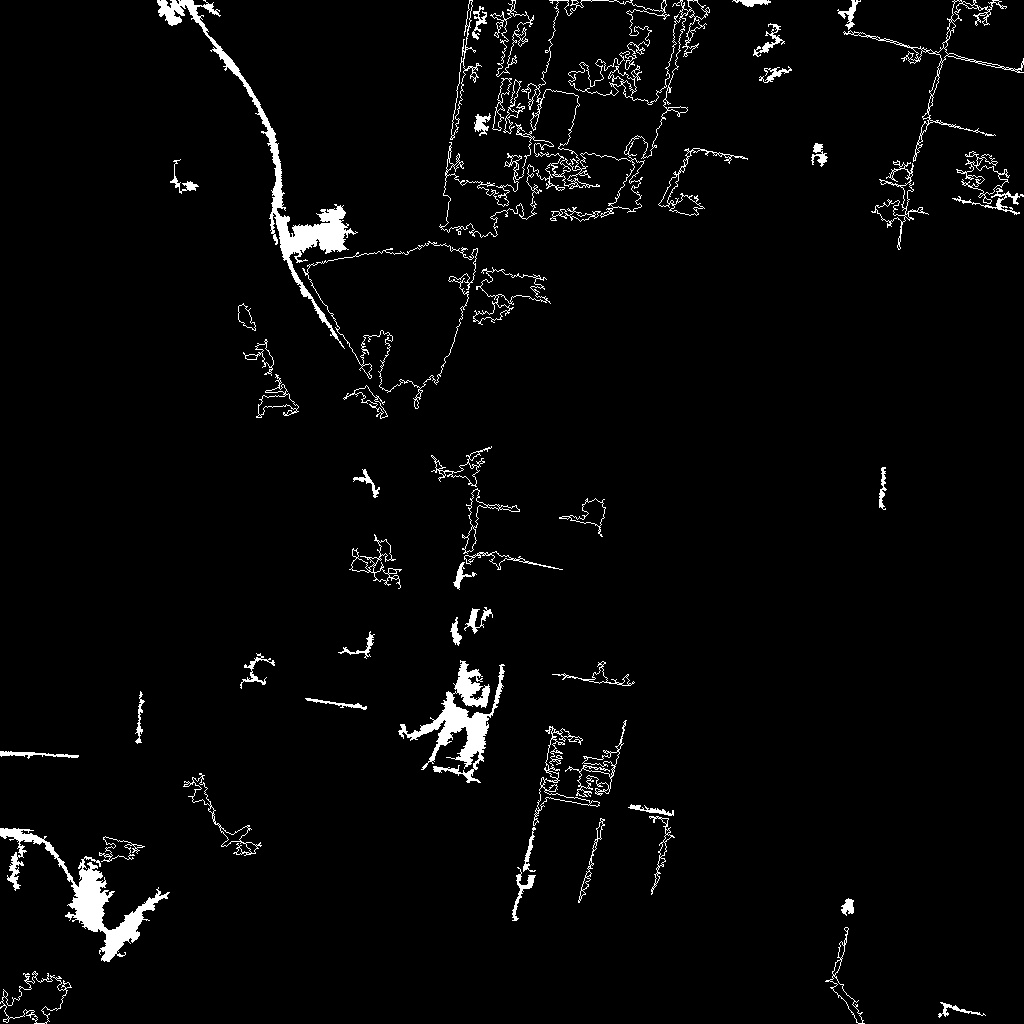

In [554]:
ret, bin_img = cv2.threshold(temp,
                             105, 255, 
                             cv2.THRESH_BINARY)
imshow(bin_img)

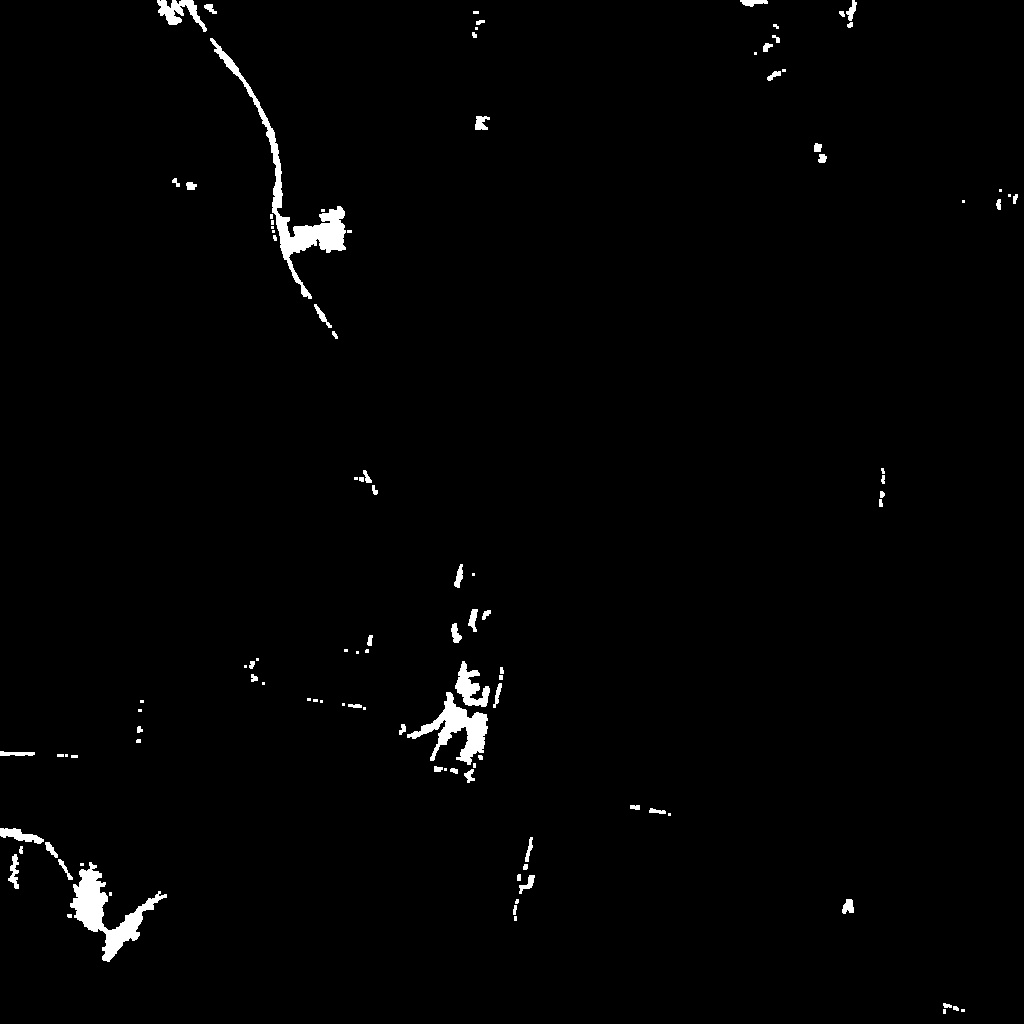

In [558]:
kernel = np.ones((3,3), np.uint8)
bin_img = cv2.morphologyEx(bin_img, 
                           cv2.MORPH_OPEN,
                           kernel,
                           iterations=1)
imshow(bin_img)

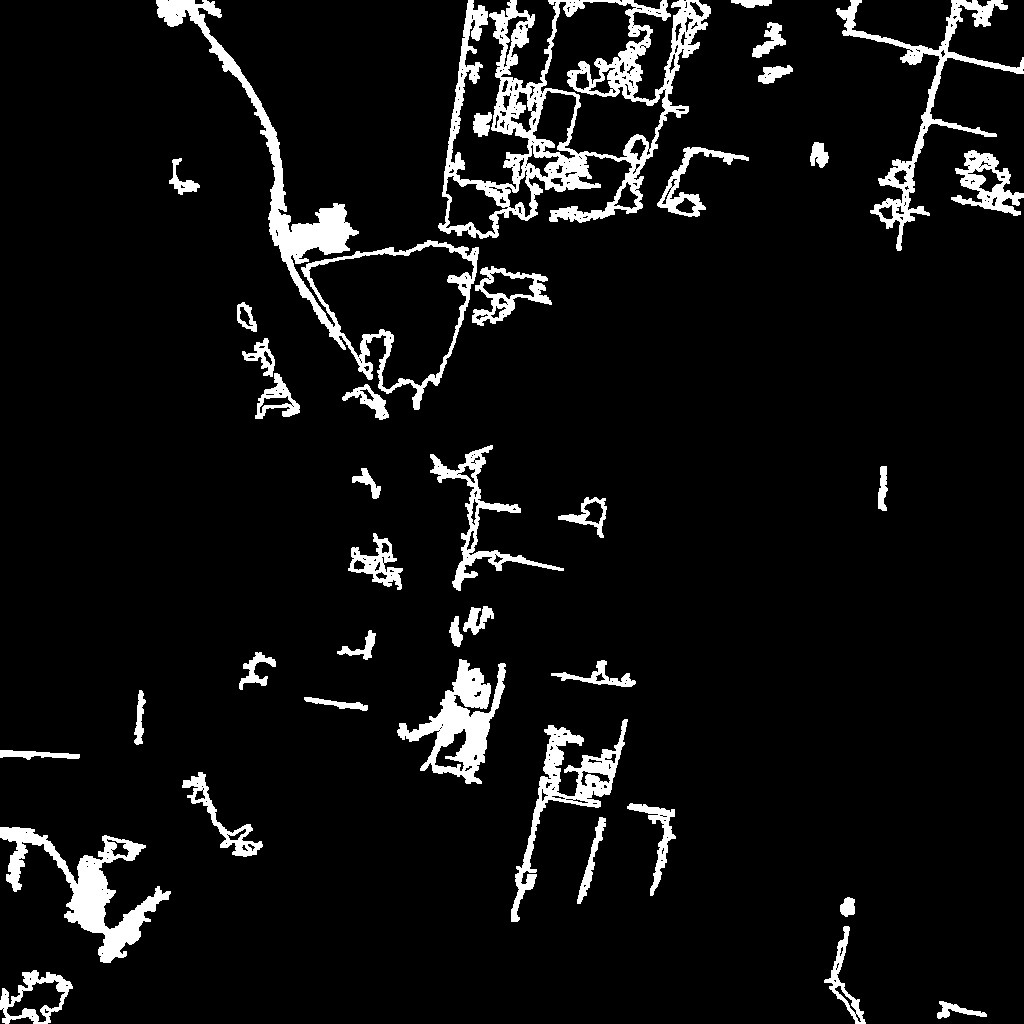

In [556]:
# binr = cv2.threshold(temp, 0, 255, 
#                      cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
# kernel = np.ones((3, 3), np.uint8)

# dilation = cv2.dilate(binr, kernel, iterations=1)
# imshow(dilation)

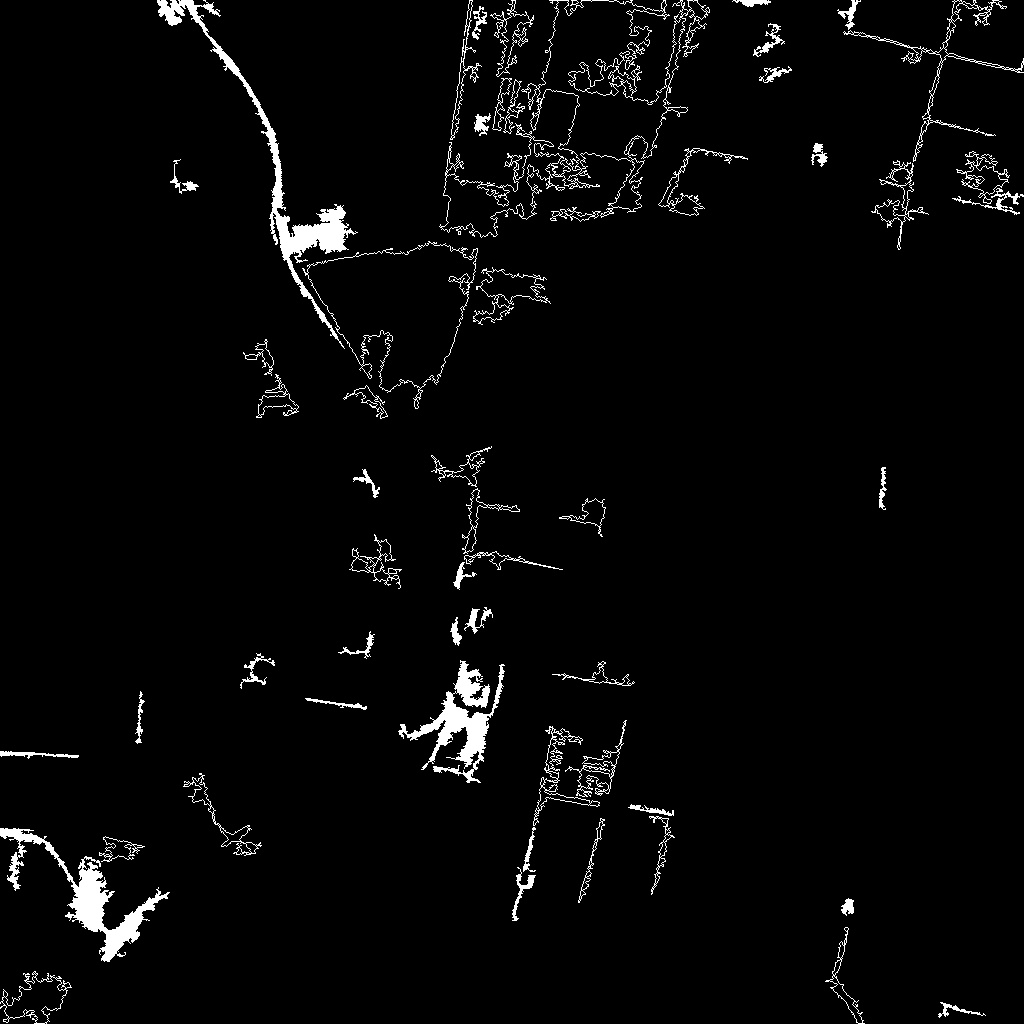

In [560]:
nb_blobs, im_with_separated_blobs, stats, _ = cv2.connectedComponentsWithStats(temp)

sizes = stats[:, -1]

sizes = sizes[1:]

nb_blobs -= 1

# minimum size of particles we want to keep (number of pixels).
# here, it's a 0fixed value, but you can set it as you want, eg the mean of the sizes or whatever.
min_size = 100

# output image with only the kept components
im_result = np.zeros_like(im_with_separated_blobs)
# for every component in the image, keep it only if it's above min_size
for blob in range(nb_blobs):
    if sizes[blob] >= min_size:
        # see description of im_with_separated_blobs above
        im_result[im_with_separated_blobs == blob + 1] = 255
imshow(im_result)

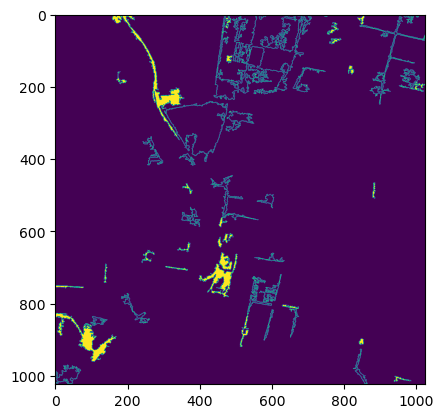

In [561]:
plt.imshow(im_result)

In [562]:
im_result[:160,:200] = 0
im_result[475:,:400] = 0
im_result[:400,430:] = 0
im_result[500:,500:] = 0

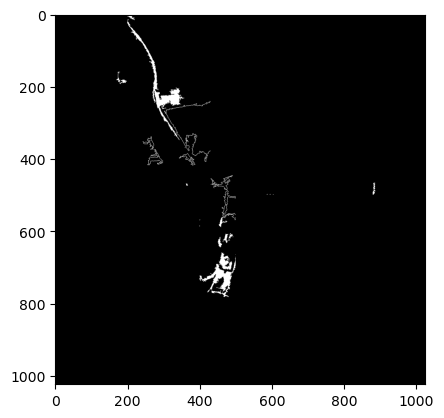

In [563]:
plt.imshow(im_result, cmap = 'gray');

In [564]:
from skimage import metrics

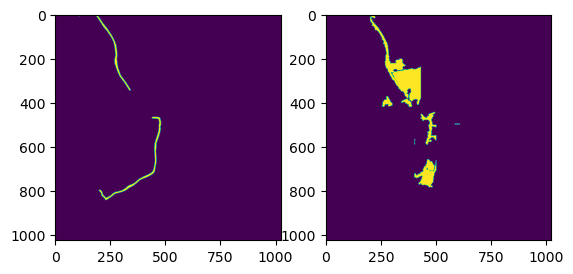

In [582]:
im1 = im_result.copy()
im2 = cv2.imread('104883_mask.png', cv2.IMREAD_GRAYSCALE)

plt.subplot(1,2,1)
plt.imshow(im2)

plt.subplot(1,2,2)
plt.imshow(im1);

In [566]:
ssim_score = metrics.structural_similarity(im1, im2, full=True)
print(f"SSIM Score: ", round(ssim_score[0], 2))

SSIM Score:  1.0


/tmp/ipykernel_5273/2718161206.py:1: UserWarning: Inputs have mismatched dtypes. Setting data_range based on im1.dtype.
  ssim_score = metrics.structural_similarity(im1, im2, full=True)
/tmp/ipykernel_5273/2718161206.py:1: UserWarning: Setting data_range based on im1.dtype. data_range = 4294967295. Please specify data_range explicitly to avoid mistakes.
  ssim_score = metrics.structural_similarity(im1, im2, full=True)


## METHOD 4

In [207]:
im_color = cv2.imread('104883_sat.jpg', cv2.IMREAD_COLOR)
im_gray = cv2.cvtColor(im_color, cv2.COLOR_BGR2GRAY)

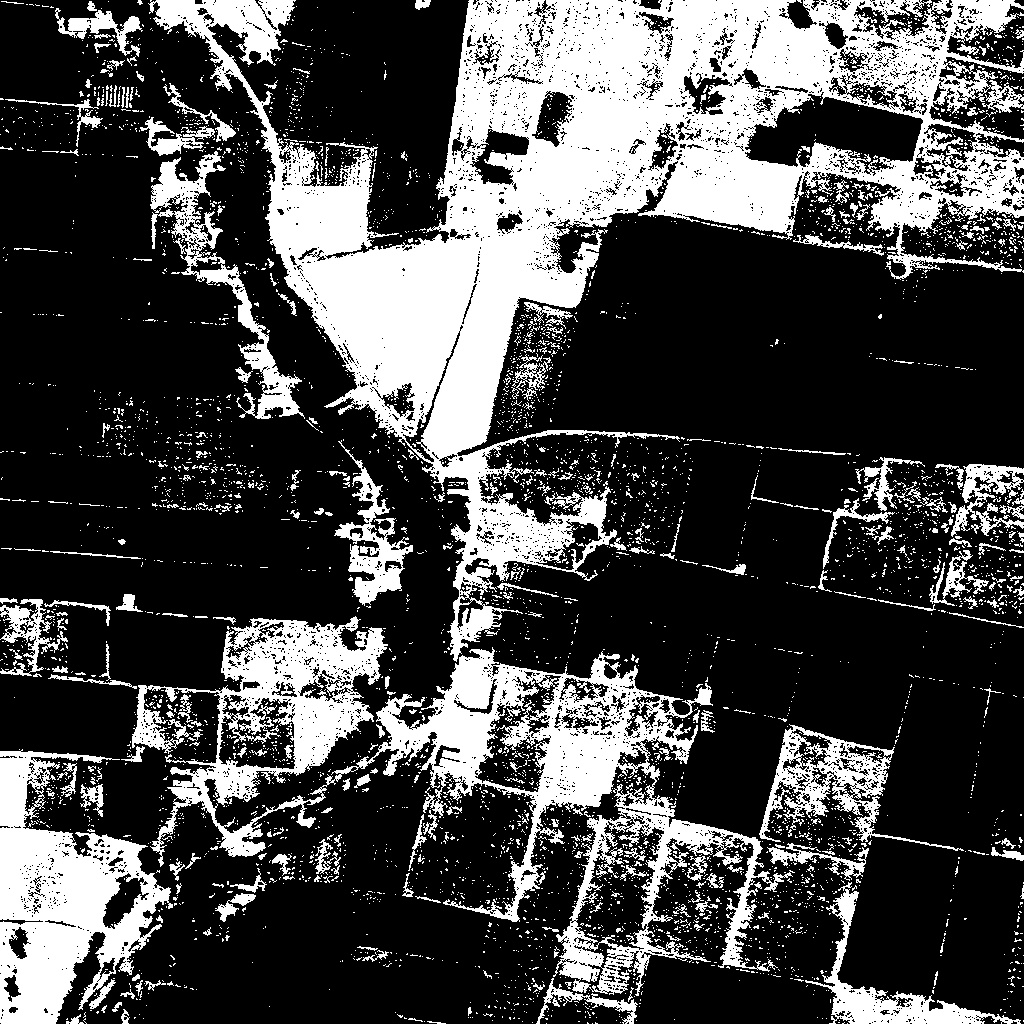

In [248]:
ret, bin_img = cv2.threshold(im_gray,
                             105, 255, 
                             cv2.THRESH_BINARY)
imshow(bin_img)

In [249]:
_, mask = cv2.threshold(bin_img, thresh=90, maxval=150, type=cv2.THRESH_BINARY)
im_thresh_gray = cv2.bitwise_and(im_gray, mask)

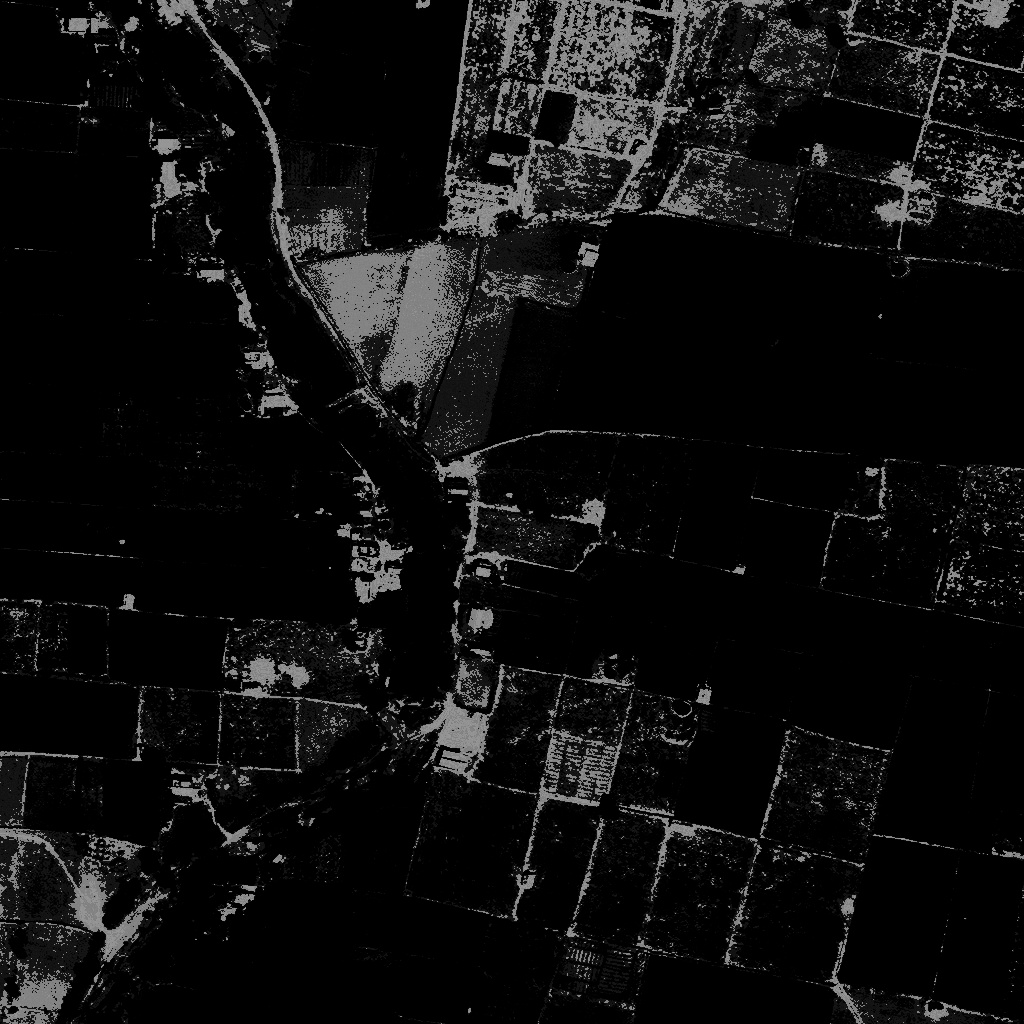

In [250]:
imshow(im_thresh_gray)

In [258]:
im_thresh_gray.shape

(1024, 1024)

In [269]:
roi = im_thresh_gray[:400, :400]
# define your_kernel as needed
roi[:] = cv2.erode(roi, (3,3), iterations = 4) 
im_thresh_gray[:400, :400] = roi[:]

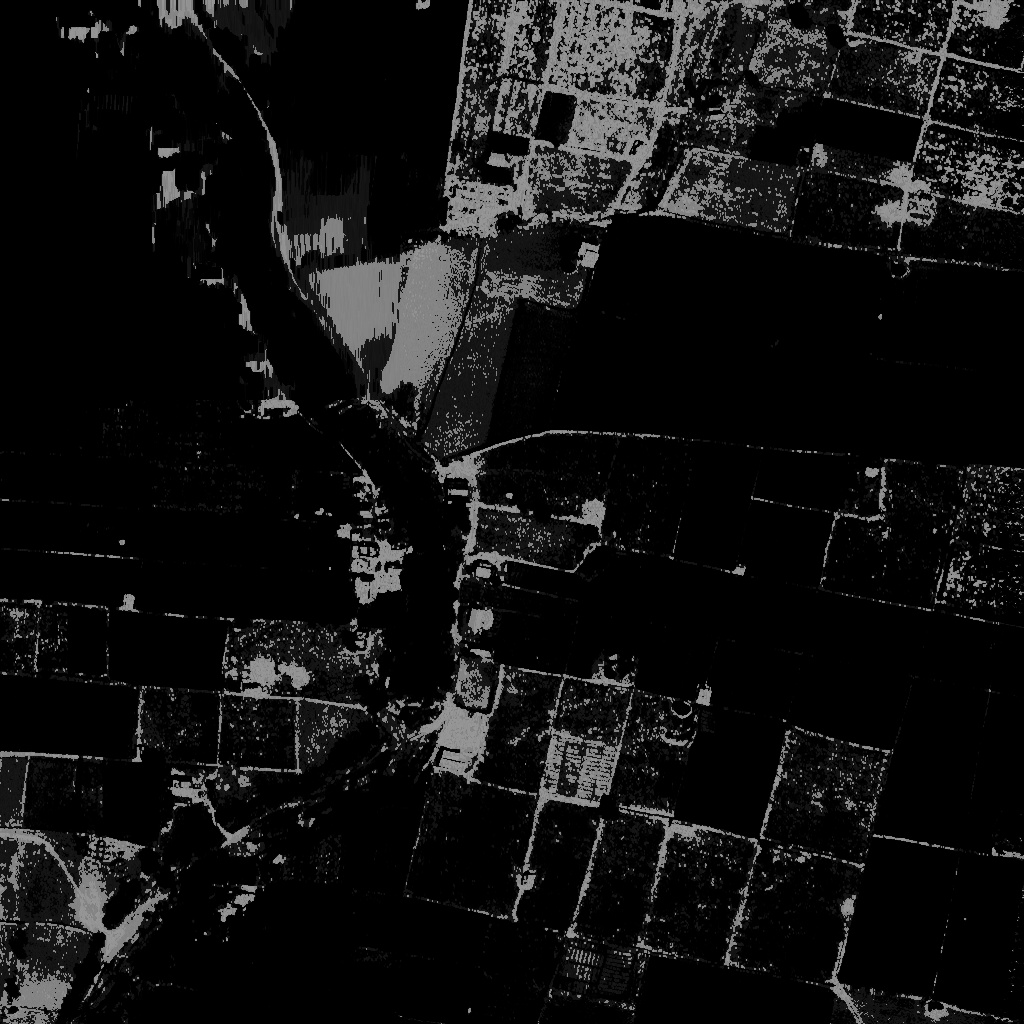

In [270]:
imshow(im_thresh_gray)